In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cmath
from mpmath import nsum, exp, inf
import math 
from scipy.integrate import quad
import sympy as sym


K = 5
myu = 1.25

In [2]:
def eq_R(p):    # Функция для нахождения корней комплексного уравнения
    x = sym.Symbol('x', real = True)
    sol = sym.solve(x**(K+1) - (p+1) * x + p, x)
    return sol


In [3]:
def F(t, lm, a):    # Подынтегральная функция
    return lm**a * t**(a-1)/(math.factorial(a-1))*np.exp(-lm*t)


In [4]:
sol = []
R = []
ro = np.linspace(0, 4.9, 20*K)  # Определение нагрузки системы

for i in range(len(ro)):   # Берем только те корни, которые по модулю меньше 1
    sol = eq_R(ro[i])
    for k in range(len(sol)):
        if abs(sol[k]) < 1:
            R.append(sol[k])
R = [sym.N(solution) for solution in R]


In [5]:
q = []
q_K1 = ((ro[K-1]/(1-R[K-1]) + nsum(lambda i: nsum(lambda k: R[K-1]**k, [0,i]), [0,K-2]))/(ro[K-1] + 1 - R[K-1]**K) + 1)**(-1)
Q_sum = 0
j = 0

while True:
    if Q_sum >= 0.999:
        break
    if 0 <= j <= K-2:
        q_j = q_K1 * nsum(lambda i: R[j]**i, [0,j]) / (ro[j] + 1 - R[j]**K)
        q.insert(j, q_j)
    elif j == K-1:
        q_j = q_K1
        q.insert(j, q_j)
    elif j == K:
        q_j = q_K1 / (ro[j] + 1 - R[j]**K)
        q.insert(j, q_j)
    elif j > K:
        q_j = q[K] * R[j]**(j - K)
        q.insert(j, q_j)
    j += 1
    Q_sum += q_j
print(Q_sum)
q

0.999238326631416


[0.199975333332807,
 0.199530607627699,
 0.199830376186983,
 0.199926676151120,
 0.199975333332807]

In [6]:
x = np.linspace(0, 4.99, len(ro)) # Определение Х
lya = ro / myu
dx = 0.001

In [21]:
def W_function(x):  # Функция W(x)
    j = 0
    W_j = 0
    if x <= 0:
        return 0 
    t = np.append(np.arange(0,x,dx),x)
    bj = j // K
    aj = K * (bj + 1) - j - 1

    while j <= len(q):
        while aj > 0 and bj > 0:
            Ia = (dx/3)*(F(t[0],lya[j],aj)+2*np.sum(F(t[2:-2:2],lya[j],aj))+4*np.sum(F(t[1:-1:2],lya[j],aj))+F(t[-1], lya[j],aj))
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ia*Ib
            j += 1
            bj = j // K + 1
            aj = K * (bj + 1) - j - 1
            if j > len(q):
                break
                
        while aj == 0 and bj > 0:
            Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
            W_j += q[j]*Ib
            j += 1
            bj = j // K + 1
            aj = K * (bj + 1) - j - 1
            if j > len(q):
                break

        while aj > 0 and bj == 0:
            Ia = (dx/3)*(F(t[0],lya[j],aj)+2*np.sum(F(t[2:-2:2],lya[j],aj))+4*np.sum(F(t[1:-1:2],lya[j],aj))+F(t[-1], lya[j],aj))
            W_j += q[j]*Ia
            j += 1
            bj = j // K + 1
            aj = K * (bj + 1) - j - 1
            if j > len(q):
                break
            
        if aj == bj == 0 or j > len(q):
            W_j = 1
            break
    
    return W_j

In [22]:
W_j = []
for j in range(len(x)):
    w = W_function(x[j])
    W_j.append(w)
W_j

IndexError: list index out of range

In [21]:
sum(W_j)

5.33895438227324

In [23]:
W = []
for i in range(len(x)):
    W_i = 0
    for k in range(i):
        W_i += W_j[k]
    W.append(W_i)
W

[0,
 0,
 0.00118548655196611,
 0.00355255854477390,
 0.00709733281315375,
 0.0118159455765992,
 0.0177512712472229,
 0.0248526086957785,
 0.0331161487509673,
 0.0425380996565763,
 0.0531146884775716,
 0.0648881173968903,
 0.0778085412068284,
 0.0918722399761521,
 0.107075510675469,
 0.123414668551453,
 0.140931258744709,
 0.159576271401977,
 0.179346073221206,
 0.200237047305873,
 0.222245594508251,
 0.245412617679354,
 0.269689922364359,
 0.295073959365378,
 0.321561195410090,
 0.349148114464933,
 0.377874991424140,
 0.407694427866225,
 0.438602956255382,
 0.470597124517204,
 0.503673497322665,
 0.537871735535783,
 0.573145217974709,
 0.609490556403755,
 0.646904377599726,
 0.685383324607515,
 0.724966457794472,
 0.765607914977245,
 0.807304384935695,
 0.850052571028007,
 0.893849192418704,
 0.938732722131774,
 0.984658039275575,
 1.03162190743571,
 1.07962110435616,
 1.12865242314053,
 1.17875376225483,
 1.22988072490913,
 1.28203014735716,
 1.33519887960489,
 1.38938378658562,
 1.44

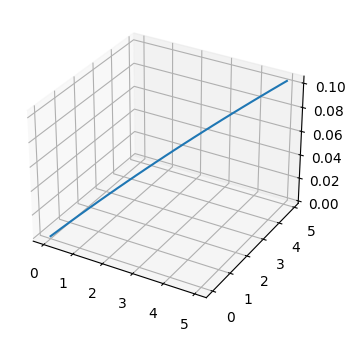

In [40]:
#fig = plt.figure()
#ax = plt.axes(projection = "3d")
#ax.set_xlabel('x')
#ax.set_ylabel('ro')
#ax.set_zlabel('W(x)')

#X, Y = np.meshgrid(x, ro)
#ax.plot_wireframe(X, Y, W)
#plt.show()

fig = plt.figure(figsize=(7, 4))
ax_3d = fig.add_subplot(projection='3d')

ax_3d.plot(x, ro, W)

In [69]:
def case_1(x):  # Функция для 1 случая в W(x)
    W_j = 0
    t = np.append(np.arange(0,x,dx),2)
    for j in range(len(q)):
        bj = j // K
        aj = K * (bj + 1) - j - 1
        Ia = (dx/3)*(F(t[0],lya[0],aj)+2*np.sum(F(t[2:-2:2],lya[2:-2:2],aj))+4*np.sum(F(t[1:-1:2],lya[1:-1:2],aj))+F(t[-1], lya[-1],aj))
        Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
        W_j += q[j]*Ia*Ib
    return W_j

In [70]:
def case_2(x):  # Функция для 2 случая в W(x)
    W_j = 0
    t = np.append(np.arange(0,x,dx),2)
    for j in range(len(q)):
        bj = j // K
        Ib = (dx/3)*(F(t[0],myu,bj)+2*np.sum(F(t[2:-2:2],myu,bj))+4*np.sum(F(t[1:-1:2],myu,bj))+F(t[-1],myu,bj))
        W_j += q[j]*Ib
    return W_j

In [77]:
def case_3(x):  # Функция для 3 случая в W(x)
    W_j = 0
    t = np.linspace(0, x, len(lya))
    for j in range(len(q)):
        bj = j // K
        aj = K * (bj + 1) - j - 1
        Ia = (dx/3)*(F(t[0],lya[0],aj)+2*np.sum(F(t[2:-2:2],lya[2:-2:2],aj))+4*np.sum(F(t[1:-1:2],lya[1:-1:2],aj))+F(t[-1], lya[-1],aj))
        W_j += q[j]*Ia
    return W_j